In [32]:
import pandas as pd
from scipy.spatial import distance
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]


In [33]:
import pandas as pd
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df20 = pd.read_csv(url2020)
df20.info()
df21 = pd.read_csv(url2021)
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

# Soru 1

In [34]:
df20.dropna(how="all",axis=1)
df21.dropna(how="all",axis=1);

# Soru 2

In [35]:
df20["date"]=pd.to_datetime(df20["date"])
df20['month'] = df20['date'].dt.month
df20_grouped=df20.groupby("month").mean()

df21["date"]=pd.to_datetime(df21["date"])
df21['month'] = df21['date'].dt.month
df21_grouped=df21.groupby("month").mean()

### mahalanobis distance'ın formülü şu şekilde:
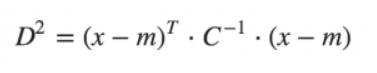

Formülü yazıp çalıştıralım

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data) # sütun ortalaması ile değerin farkı
    cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat) #.dot= matris çarpımı
    mahal = np.dot(left_term, x_minus_mu.T)
    #print(mahal)
    return mahal.diagonal()

attributes=list(df20.columns[9:15])
df21_grouped['mahala'] = mahalanobis(x=df21_grouped[attributes], data=df21_grouped[attributes])
df21_grouped.sort_values("mahala", ascending=False)[["mahala"]]

,mahala
month,
4,6.946990
1,6.529720
5,6.527793
7,6.314734
2,5.917862
8,5.860010
6,5.306735
10,4.702667
9,3.008164


**!!2021 verisi için 4. ayın en outlier değerlere sahip olduğunu söyleyebiliriz.!!**

2020 verisine bakarsak: (aynısının 2020 hali)

In [6]:
df20_grouped['mahala'] = mahalanobis(x=df20_grouped[attributes], data=df20_grouped[attributes])
df20_grouped.sort_values("mahala", ascending=False)[["mahala"]]

,mahala
month,
4,8.602830
5,8.229767
6,7.663963
12,6.815570
2,6.799677
8,6.643364
10,5.844341
7,3.050788
3,2.515010


**!!Yine 4. ayın diğer aylara göre daha aykırı değerlere sahip olduğunu görebiliyoruz.!!**

# 3. Soru

In [7]:
#COSINE 
attributes=list(df20.columns[9:15]) #9-14 column names 
df21_grouped_9_14=df21_grouped[attributes].iloc[1:,:]
df20_grouped_9_14=df20_grouped[attributes].iloc[0:9:,:]

from numpy import dot
from numpy.linalg import norm
for i in range(0,9):
    data2020=df20_grouped_9_14.iloc[i]
    data2021=df21_grouped_9_14.iloc[i]
    print("{}. ay benzerlik skoru: {}".format(i+2, dot(data2020, data2021)/(norm(data2020)*norm(data2021)) ))

2. ay benzerlik skoru: -0.23583136408666658
3. ay benzerlik skoru: 0.746140069906985
4. ay benzerlik skoru: 0.8064862735089197
5. ay benzerlik skoru: 0.9161627155349275
6. ay benzerlik skoru: 0.64540865594727
7. ay benzerlik skoru: 0.8145045830310111
8. ay benzerlik skoru: 0.7446885299708058
9. ay benzerlik skoru: 0.5041868767390624
10. ay benzerlik skoru: 0.5724891776527646


In [8]:
# euclidean
from scipy.spatial import distance
from sklearn import preprocessing
normalized_df20=(df20_grouped_9_14-df20_grouped_9_14.mean())/df20_grouped_9_14.std()
normalized_df21=(df21_grouped_9_14-df21_grouped_9_14.mean())/df21_grouped_9_14.std()
for i in range(0,9):
    data2020=df20_grouped_9_14.iloc[i]
    data2021=df21_grouped_9_14.iloc[i]
    
    print("{}. ay benzerlik skoru: {}".format(i+2,   distance.euclidean(data2020,data2021)))

2. ay benzerlik skoru: 67.95243475646674
3. ay benzerlik skoru: 29.47133888554187
4. ay benzerlik skoru: 76.6616973843832
5. ay benzerlik skoru: 45.83803909317266
6. ay benzerlik skoru: 48.883804794725314
7. ay benzerlik skoru: 78.21902395332147
8. ay benzerlik skoru: 71.10592039286792
9. ay benzerlik skoru: 76.93245518324605
10. ay benzerlik skoru: 66.19875201491274


# 4. SORU

In [9]:
df20.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,month
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0,2
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0,2
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0,2


In [10]:
df20["date"]=pd.to_datetime(df20["date"])
df20['month'] = df20['date'].dt.month

In [11]:
import random
random_idx=random.sample(range(0, len(df20)), len(df20))
sample_list=list()
size_list=list()
current_pos=0
for i in range(0,len(df20)):
    random_num=random.randint(50, 1000)
    size_list.append(random_num)
    if(current_pos+random_num>len(df20)):
        sample_list.append(df20.iloc[random_idx[current_pos:]].groupby("month").mean().loc[:,attributes])
        break
    sample_list.append(df20.iloc[random_idx[current_pos:current_pos+random_num]].groupby("month").mean().loc[:,attributes])
    current_pos+=random_num

In [12]:
def get_random_samples():
    import random
    random_idx=random.sample(range(0, len(df20)), len(df20))
    sample_list=list()
    size_list=list()
    current_pos=0
    for i in range(0,len(df20)):
        random_num=random.randint(50, 1000)
        size_list.append(random_num)
        if(current_pos+random_num>len(df20)):
            sample_list.append(df20.iloc[random_idx[current_pos:]].groupby("month").mean().loc[:,attributes])
            break
        sample_list.append(df20.iloc[random_idx[current_pos:current_pos+random_num]].groupby("month").mean().loc[:,attributes])
        current_pos+=random_num
        return sample_list

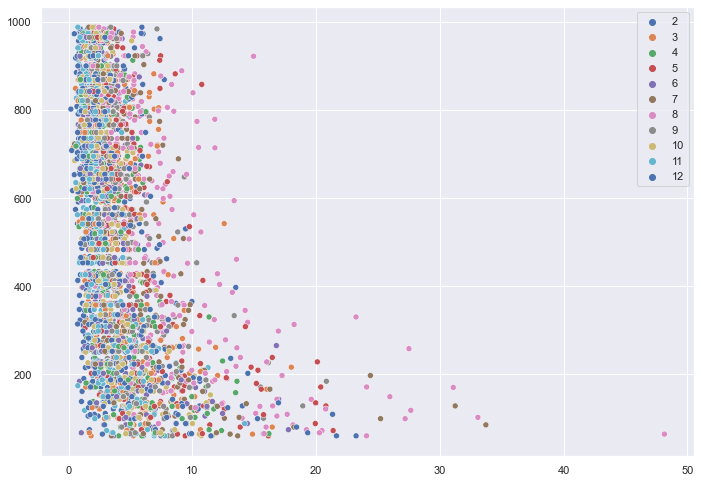

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(df20_grouped.index)))

sns.set(rc={'figure.figsize':(11.7,8.27)})
def display_funct(differs, size, legend_):
    sns.scatterplot(y=11*[size],
        x=differs.abs().mean(axis=1),
        palette="deep",
        hue=list(df20_grouped.index),
        legend=legend_,
        )
control=1
for sample_df, size in zip(sample_list[:], size_list[:]):
    differs=df20_grouped - sample_df
    if control==1:
        display_funct(differs, size, True)  
        control=0
    display_funct(differs, size, False)

### SORU 5

In [29]:
features=list(df20.columns[9:15])

In [31]:
import random 
def twoD_array_init(data, num_rows, num_columns): 
    return [[data for i in range(num_columns)] for j in range(num_rows)] 
sample_list2 = twoD_array_init(1, 20, 11) 
random_idx=random.sample(range(0, len(df20)), len(df20)) 
size_list=list() 
current_pos=0 
for i, sample_number in zip(np.arange(50,1050,50), np.arange(0,12)):
    if(current_pos+random_num>df20.month.value_counts().min()): 
        break 
    for k in range(0,11): 
        original=df20[features][df20.month==k+2].mean() 
        sample=df20[features][df20.month==k+2].iloc[current_pos:i].mean() 
        sample_list2[sample_number][k]=original-sample 
size_list.append(i) 

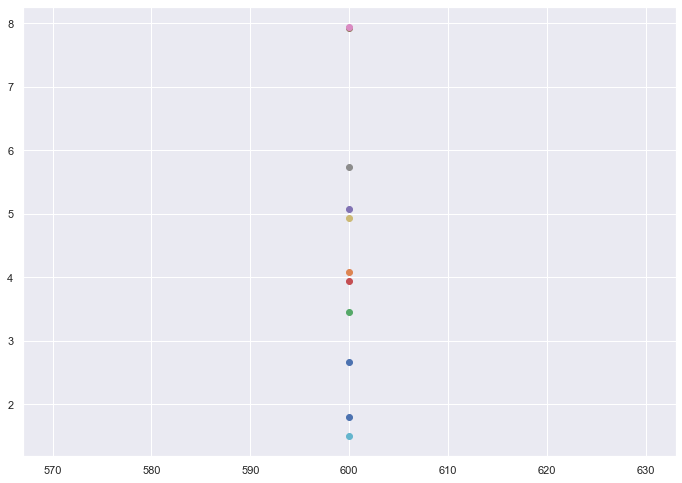

In [30]:
import matplotlib.pyplot as plt 
for i, sizeinx in zip(sample_list2, range(0, len(sample_list2))): 
    for k in i: 
        if(sizeinx>=np.shape (size_list)[0]): 
            break 
        plt.scatter(y=k.abs().mean(), 
        x=size_list[sizeinx]) 